# Reading Maps

## Goal 
To be able to identify to purpose of a given map. Identify the important components of a map, the different styles of maps, and how the map author can use different techniques to be able to communicate information effectively.

## Outline 
    - Reading map exercise
    - Map Discussion 
    - What goes into reading a map?
    - What is the purpose of 
    - Orienteering?

In [33]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import cm
from matplotlib.patches import Polygon

import pandas as pd
import numpy as np

In [9]:
cmap = cm.get_cmap('Spectral')
df = pd.DataFrame({
      'x': [1, 2, 3],
      'y': [2, 3, 1]
   })

df['label'] = df.apply(lambda x: F'({x[0]}, {x[1]})', axis=1)

# Data in GIS

So we know how to interpret different data types in GIS.  

Now what?

## Features and Layers

A map is made up of a single or multiple data:
- Layers
- Features

## Feature Types

![Vectors vs Raster](https://mgimond.github.io/Spatial/img/vector_vs_raster.jpg)

## Vectors

Can be represented as three different types of features:
- points
- lines
- polygons

## Points

An ( x , y ) or ( long, lat ) coordinate pair*

*sometimes the order of the variables is different depending on the software.

#### Point(1, 2) Point(2,3) Point(3,1)

#### Point(47.261780, -122.481689)  
#### Point(1148411.465, 709443.892)  

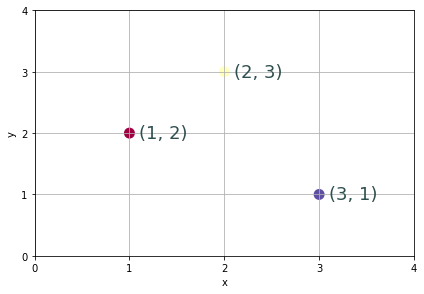

In [19]:
pointfig, ax = plt.subplots()
plt.xlim([0, 4])
plt.ylim([0, 4])
plt.margins(0.05)
plt.tight_layout()
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_locator(ticker.MaxNLocator(integer=True))
        
df.plot('x', 'y', kind='scatter', ax=ax, s=120, linewidth=0, 
        c=range(len(df)), colormap=cmap)

for k, v in df.iterrows():
    ax.annotate(
        v.label, 
        xy=(v.x,v.y),
        xytext=(10,-5), 
        textcoords='offset points',
        family='sans-serif', 
        fontsize=18, 
        color='darkslategrey'
    )
plt.grid(True)


## Polylines

Also known as LingStrings

A list of (x,y) or (long, lat) coordinate pairs

Order matters here.

#### LINESTRING(1 2, 2 3, 3 1)  

#### LINESTRING(47.261780 -122.481689, 47.25533115651906, -122.48364162973934, 47.255637,-122.466218)  
#### LINESTRING(1148411.465, 709443.892, 1147867.629 707104.647, 1152195.892 707107.842)  

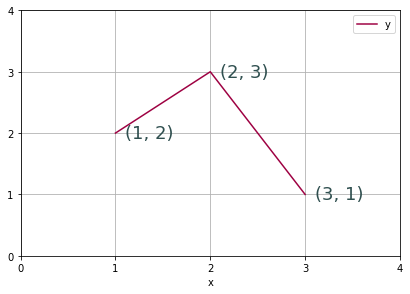

In [20]:
linefig, ax = plt.subplots()
plt.xlim([0, 4])
plt.ylim([0, 4])
plt.margins(0.05)
plt.tight_layout()
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_locator(ticker.MaxNLocator(integer=True))
        
df.plot.line(x='x', y='y', ax=ax, colormap=cmap)

for k, v in df.iterrows():
    ax.annotate(
        v.label, 
        xy=(v.x,v.y),
        xytext=(10,-5), 
        textcoords='offset points',
        family='sans-serif', 
        fontsize=18, 
        color='darkslategrey'
    )
plt.grid(True)


## Polygons

Also known as LingStrings

A list of (x,y) or (long, lat) coordinate pairs, ending with the point that will close the polygon.

Order matters here again

#### POLYGON(1 2, 2 3, 3 1, 1 2)  

#### POLYGON(47.261780 -122.481689, 47.25533115651906 -122.48364162973934, 47.255637 -122.466218, 47.261780 -122.481689)  
#### POLYGON(1148411.465, 709443.892, 1147867.629 707104.647, 1152195.892 707107.842, 1148411.465, 709443.892)  

Polygon with a hole:

#### POLYGON ((35 10, 45 45, 15 40, 10 20, 35 10), (20 30, 35 35, 30 20, 20 30))

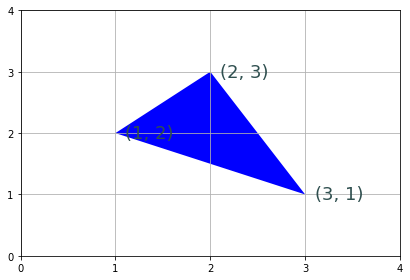

In [37]:
polyfig, ax = plt.subplots()
plt.xlim([0, 4])
plt.ylim([0, 4])
plt.margins(0.05)
plt.tight_layout()
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_locator(ticker.MaxNLocator(integer=True))    

p = Polygon(df[['x', 'y']].to_numpy(), facecolor = 'blue')
ax.add_patch(p)
for k, v in df.iterrows():
    ax.annotate(
        v.label, 
        xy=(v.x,v.y),
        xytext=(10,-5), 
        textcoords='offset points',
        family='sans-serif', 
        fontsize=18, 
        color='darkslategrey'
    )

plt.grid(True)

### MultiPart Features

Some features cannot be represented by a single point, line, or polygon. 

As such they are Multipart Features


#### MULTIPOINT((1, 2), (2,3), (3,1)) 
#### MULTILINESTRING((1 2, 2 3, 3 1), (3 4, 4 5, 5 3))  
#### MULTIPOLYGON((1 2, 2 3, 3 1, 1 2), (3 4, 4 5, 5 3, 3 4))

## Rasters

Represents data as an array of cells, or pixels. 

Each cell/pixel/grid has an associated value.


For you math nerds out there, its a matrix!

In [40]:
matrix = np.random.randint(1,6, size=(10, 10))
matrix

array([[3, 3, 2, 4, 1, 3, 5, 3, 3, 1],
       [5, 5, 2, 2, 5, 2, 5, 3, 4, 1],
       [4, 4, 4, 4, 5, 5, 2, 1, 4, 1],
       [5, 5, 4, 3, 4, 5, 1, 2, 3, 4],
       [1, 5, 5, 3, 2, 1, 5, 4, 3, 4],
       [5, 5, 3, 5, 5, 3, 3, 4, 4, 5],
       [1, 4, 1, 1, 4, 4, 2, 4, 3, 1],
       [4, 2, 5, 2, 5, 5, 5, 2, 2, 2],
       [1, 4, 5, 3, 1, 5, 3, 5, 3, 1],
       [4, 2, 5, 5, 1, 3, 5, 1, 1, 4]])

![Rasters, Oh My!](https://mgimond.github.io/Spatial/02-Feature-representation_files/figure-html/unnamed-chunk-4-1.png)

### Raster Properties
Pixel dimensions: A pixel in a raster dataset will always have the same height and width.  

The smaller the cell size, the smoother or more detailed the raster will be.  

The greater the number of cells, the longer it will take to process, and it will increase the demand for storage space.  

![Rasters at Different Reso](https://desktop.arcgis.com/en/arcmap/10.3/manage-data/raster-and-images/GUID-F1FD32DF-3924-4EC6-907E-D0B8BFB8DBEF-web.gif)

Often you need to specify the extent of a raster. The extent is defined by the top, bottom, left, and right coordinates of the rectangular area covered by a raster, as shown below.

![Rasters at Different Reso](https://desktop.arcgis.com/en/arcmap/10.3/manage-data/raster-and-images/GUID-B59895EA-0676-488C-AC9F-70C586AEEA50-web.gif)

## Object vs Field


### Object View
An object view of the world treats entities as discrete objects; they need not occur at every location within a study area. Point locations of cities would be an example of an object. So would be polygonal representations of urban areas which may be non-contiguous.

### Field View

- A field view of the world treats entities as a scalar field. 
- S scalar is a quantity having a magnitude. 
- It is measurable at every location within the study region. 


Examples:
- Surface elevation
- Surface temperature
- Each represents a property that can be measured at any location.
  
[DNR LIDAR PORTAL](https://lidarportal.dnr.wa.gov/)

## Scale 

Ratio of distance on the map to that in the real world

- Large Scale:  
relatively large ratio and thus a small extent

- Small Scale:
relatively small ratio and thus a large extent

### Small Scale

Map of the Boston area at a 1:10,000,000 scale

![Small Scale](https://mgimond.github.io/Spatial/img/Boston_small_scale.jpg)


### Large Scale

Map of the Boston area at a 1:34,000 scale

![Large Scale](https://mgimond.github.io/Spatial/img/Boston_large_scale.jpg)


## Attribute Data

A point on the map is not always super valuable. 

Or at least it doesn't really tell us a whole lot.  

Whats is helpful is if we can assoicate additional data with spatial location.  

This is the magic...

## Data Types

### Nominal data 
- no implied order, size or quantitative information (e.g. paved and unpaved roads)

### Ordinal data 
- have an implied order (e.g. ranked scores), however, we cannot quantify the difference since a linear scale is not implied.

### Interval data 
- are numeric and have a linear scale, however they do not have a true zero and can therefore not be used to measure relative magnitudes. For example, one cannot say that 60°F is twice as warm as 30°F since when presented in degrees °C the temperature values are 15.5°C and -1.1°C respectively (and 15.5 is clearly not twice as big as -1.1).


### Ratio scale data
- are interval data with a true zero such as monetary value (e.g. $1, $20, $100).

## ArcGIS Example

## In-Class Activity


### Read a Map

- Pair up with a partner, and spend 5 minutes looking at the 15 maps provided
- Answer the following questions:
    1) What is the purpose of the map  
    2) What projection is the data in  
    3) What type of data is presented
    4) What parts of the map are critical for assisting in understanding the map

# Reading

Learning ArcGIS Pro 2: Chapter 5